In [2]:
import os #for file handling
import cv2 #for image processing
import tensorflow as tf #for dl
import numpy as np #for numerical operations
import matplotlib.pyplot as plt #for plotting graphs
from emnist import extract_training_samples, extract_test_samples

In [37]:
x_train, y_train=extract_training_samples('letters')
x_test, y_test=extract_test_samples('letters')

In [48]:
x_train.shape

(124800, 28, 28)

In [51]:
x_test.shape

(20800, 28, 28)

(28, 28)
X


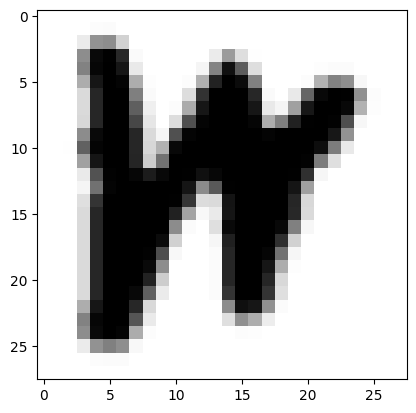

In [61]:
test=0
first_image = x_train[test]
first_result= y_train[test]
print(first_image.shape)

ch = chr(first_result + ord('A'))
print(ch)
plt.imshow(first_image,cmap=plt.cm.binary)
plt.show()


In [5]:
x_train = x_train / 255.0  # Scale pixel values to [0, 1]
x_test = x_test / 255.0

In [6]:
# Preprocess the labels to convert them to integers
y_train = y_train - 1  # EMNIST labels start from 1, subtract 1 to make them start from 0
y_test = y_test - 1

In [20]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(360, activation="relu"))
model.add(tf.keras.layers.Dense(360, activation="relu"))
model.add(tf.keras.layers.Dense(360, activation="relu"))
model.add(tf.keras.layers.Dense(52, activation="softmax"))

In [21]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [22]:
#fitting the model
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
3900/3900 [==============================] - 29s 7ms/step - loss: 0.5423 - accuracy: 0.8303
Epoch 2/10
3900/3900 [==============================] - 27s 7ms/step - loss: 0.3130 - accuracy: 0.8958
Epoch 3/10
3900/3900 [==============================] - 27s 7ms/step - loss: 0.2587 - accuracy: 0.9125
Epoch 4/10
3900/3900 [==============================] - 27s 7ms/step - loss: 0.2276 - accuracy: 0.9217
Epoch 5/10
3900/3900 [==============================] - 32s 8ms/step - loss: 0.2040 - accuracy: 0.9281
Epoch 6/10
3900/3900 [==============================] - 34s 9ms/step - loss: 0.1871 - accuracy: 0.9335
Epoch 7/10
3900/3900 [==============================] - 29s 8ms/step - loss: 0.1733 - accuracy: 0.9377
Epoch 8/10
3900/3900 [==============================] - 30s 8ms/step - loss: 0.1639 - accuracy: 0.9407
Epoch 9/10
3900/3900 [==============================] - 31s 8ms/step - loss: 0.1542 - accuracy: 0.9439
Epoch 10/10
3900/3900 [==============================] - 31s 8ms/step - l

In [23]:
model.save('alphabets.model')

INFO:tensorflow:Assets written to: alphabets.model\assets


INFO:tensorflow:Assets written to: alphabets.model\assets


In [24]:
#evaluating the model
loss,accuracy=model.evaluate(x_test,y_test)
print(loss*100)
print(accuracy*100)

650/650 [==============================] - 1s 2ms/step - loss: 0.3609 - accuracy: 0.9115
36.08854115009308
91.14903807640076


1/1 [==============================] - 0s 106ms/step
				  The letter is probably:
						' P '


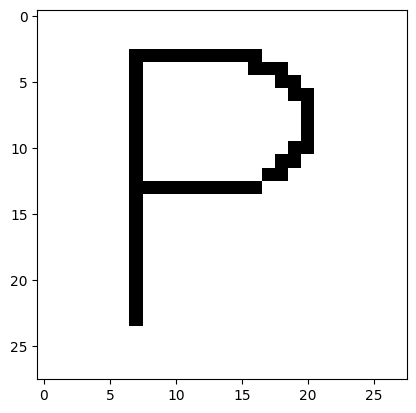

In [63]:
#load and use the model
model=tf.keras.models.load_model('alphabets.model')

#loading the image
img=cv2.imread(f"alphabets/alphaP.png")[:,:,0]

#inverting the image
img=np.invert(np.array([img]))

#make prediction
prediction=model.predict(img)

cs=''
#determine the label
predicted_label = np.argmax(prediction)
recognized_character = chr(predicted_label + ord('A'))
print("\t\t\t\t  The letter is probably:\n\t\t\t\t\t\t'",recognized_character,"'")
plt.imshow(img[0],cmap=plt.cm.binary)
plt.show()
